📖 Recommended Reading: [Reinforcement Learning In 31 Steps](https://bobrupakroy.medium.com/reinforcement-learning-in-31-steps-960aedc8f19c)

🎥 Recommended Video: [Reinforcement Learning Crash Course](https://www.youtube.com/watch?v=nIgIv4IfJ6s)

🎥 Optional Video: [Reinforcement Learning from scratch](https://www.youtube.com/watch?v=vXtfdGphr3c)

🎥 Optional Video: [Reinforcement Learning: Deep Q Learning and Policy Gradient](https://www.youtube.com/watch?v=k0eMEhgTYZQ&t=13s)





# Introduction to Reinforcement Learning: Training Machines to Make Smart Decisions

Imagine teaching a robot to play a video game. The robot starts with no idea what the rules are but gradually learns by trying different moves, observing the results, and improving its strategies. This learning process is the essence of **Reinforcement Learning (RL)**.

Reinforcement Learning is a machine learning paradigm where an agent learns to make decisions by interacting with an environment. The agent aims to maximize cumulative rewards over time. Unlike supervised learning, which relies on labeled data, RL learns through feedback in the form of **rewards** (positive feedback) or **penalties** (negative feedback).

---

## What Makes RL Unique?

RL is designed for problems involving sequential decision-making, where the outcome depends on a series of actions. This makes RL ideal for applications like:

- Training robots to walk or play games.
- Optimizing resource allocation in dynamic systems.
- Developing AI agents for self-driving cars or personalized recommendations.

Machines in RL learn by trial and error, adapting their strategies to maximize rewards over time.

---

## Key Components of Reinforcement Learning

![Reinforcement Learning Framework](https://drive.google.com/uc?export=view&id=1X4hF2u62vxovGyTdJLmk-lkG4DZEEent)


1. **Agent**: The decision-maker or learner that takes actions.
2. **Environment**: The external system the agent interacts with.
3. **State**: A snapshot of the current situation within the environment.
4. **Action**: A choice made by the agent that affects the state.
5. **Reward**: Feedback received after taking an action, guiding the agent’s learning process.

The interaction can be summarized as:

1. The agent observes the **state** of the environment.
2. It takes an **action** based on its current knowledge.
3. The environment provides a **reward** and transitions to a new **state**.

---

## Types of RL Algorithms

Reinforcement Learning algorithms fall into three main categories:

1. **Value-Based**
   - The agent learns to estimate the value of states or actions.
   - Example: Q-Learning, which assigns a value to each action in a state.

2. **Policy-Based**
   - The agent directly learns a policy (a mapping from states to actions).
   - Example: Policy Gradient methods, which optimize the policy using rewards.

3. **Model-Based**
   - The agent builds a model of the environment and uses it to plan actions.
   - Example: Dynamic Programming, which requires a known model of the environment.

---

## Multi-Armed Bandit (MAB) Problem

The **Multi-Armed Bandit** (MAB) problem is a foundational scenario in Reinforcement Learning. Imagine you’re at a casino, facing a row of slot machines (bandits). Each machine offers an unknown probability of payout, and your goal is to maximize your total winnings. The challenge lies in balancing:

- **Exploration**: Trying out different machines to learn their payouts.
- **Exploitation**: Sticking to the machine with the highest-known payout.

MAB problems are widely applicable in:
- Ad placement optimization.
- Clinical trials to find the best treatment.
- Recommendation systems for personalized content.

---

## Techniques for Solving MAB Problems

### 1. Upper Confidence Bound (UCB)
- A strategy that balances exploration and exploitation by estimating an upper confidence limit for each arm.
- The agent chooses the arm with the highest upper confidence bound, ensuring it explores uncertain options while exploiting the best-known ones.

### 2. Thompson Sampling
- A Bayesian approach where the agent maintains a probability distribution for each arm’s reward.
- At each step, it samples from these distributions and selects the arm with the highest sampled reward.

These techniques help solve MAB problems efficiently and provide a foundation for more complex RL scenarios.

---

Reinforcement Learning bridges the gap between data-driven learning and decision-making in dynamic environments. By understanding its principles, we unlock the potential to build intelligent agents capable of solving real-world challenges.

📖 Recommended Reading: [Reinforcement Learning In 31 Steps](https://bobrupakroy.medium.com/reinforcement-learning-in-31-steps-960aedc8f19c)


## UCB (Upper Confidence Bound)

Imagine you’re at a food court with 5 new restaurants. You want to discover the best one, but there’s a catch: you don’t want to waste too much money trying bad options. This is a classic **exploration vs. exploitation** problem:
- **Exploitation**: Keep going to the restaurant you know is good.
- **Exploration**: Try new restaurants that might be even better.

The **Upper Confidence Bound (UCB)** algorithm tackles this problem by balancing the two. It prioritizes options with high uncertainty while leveraging what it already knows.

---

### UCB Formula

For each option (or "arm") $i$, the UCB algorithm calculates a confidence bound as:

$$
\text{UCB}_i(t) = \hat{\mu}_i + \sqrt{\frac{2 \ln(t)}{N_i}}
$$

Where:
- $\hat{\mu}_i$: The estimated mean reward of arm $i$ based on past observations.
- $t$: The current round (time step).
- $N_i$: The number of times arm $i$ has been selected so far.
- $\sqrt{\frac{2 \ln(t)}{N_i}}$: The exploration term, which encourages selecting less frequently chosen options.

### Breaking It Down

The formula balances:
1. **Exploitation**: The first term ($\hat{\mu}_i$) represents the average reward so far—favoring options that have performed well.
2. **Exploration**: The second term ($\sqrt{\frac{2 \ln(t)}{N_i}}$) adds a bonus for options that haven’t been tried much, shrinking as an option is selected more often.

### Selection Rule

At each round $t$, choose the arm $i$ that maximizes the UCB score:

$$
i = \arg\max_i \text{UCB}_i(t)
$$

This ensures that you explore enough early on, but increasingly focus on the best-known options over time.

---

### UCB in Practice

Let’s revisit the food court analogy. You’re trying to maximize enjoyment while minimizing wasted meals. Translating the UCB formula, we can express it as:

$$
\text{Score} = \underbrace{\text{Average reward so far}}_{\text{exploitation}} + \underbrace{\sqrt{\frac{2 \times \log(\text{total rounds})}{\text{times we tried this option}}}}_{\text{exploration bonus}}
$$

Here’s how it works:

1. **Average Reward So Far**: Captures what you already know works (exploitation).
2. **Exploration Bonus**: Encourages trying less-explored options; it’s higher for options with fewer attempts.
3. **Shrinking Bonus**: As you try an option more times, the bonus diminishes, focusing on the best options.

---

### How UCB Operates

1. Track the performance (reward) of each option.
2. Count how many times each option has been tried.
3. In each round:
   - Calculate a UCB score for each option using the formula.
   - Select the option with the highest score.
   - Observe the reward and update the statistics.

---

The UCB algorithm strikes a balance between exploration and exploitation, ensuring that over time, you make decisions that maximize cumulative rewards while learning about all available options.



### Example
Say we have 5 slot machines with different win rates (20%, 50%, 30%, 80%, 10%)

In [ ]:
import numpy as np

# Initialize parameters
n_arms = 5  # number of slot machines
n_rounds = 1000  # number of rounds to play

# True probabilities of winning for each slot machine (unknown to the algorithm)
true_rewards = [0.2, 0.5, 0.3, 0.8, 0.1]

# Initialize arrays to track performance
estimates = np.zeros(n_arms)  # mean reward estimates
n_pulls = np.zeros(n_arms)   # number of times each arm was pulled
total_reward = 0

In [ ]:
# First try each arm once (TRIAL RUN)
for arm in range(n_arms):
    # Simulate pulling the arm
    reward = np.random.binomial(1, true_rewards[arm])

    # Update counts
    n_pulls[arm] += 1

    # Update reward estimate for this arm
    estimates[arm] = reward

    total_reward += reward

print("Initial estimates after trying each arm once:", estimates)
print("Number of pulls:", n_pulls)

Initial estimates after trying each arm once: [0. 1. 1. 1. 0.]
Number of pulls: [1. 1. 1. 1. 1.]


In [ ]:
# Continue for remaining rounds
for t in range(n_arms, n_rounds):
    # Calculate UCB for each arm
    exploration_bonus = np.sqrt(2 * np.log(t) / n_pulls)
    ucb_values = estimates + exploration_bonus

    # Select arm with highest UCB value
    chosen_arm = np.argmax(ucb_values)

    # Get reward (simulate slot machine pull)
    reward = np.random.binomial(1, true_rewards[chosen_arm])

    # Update statistics
    n_pulls[chosen_arm] += 1
    old_estimate = estimates[chosen_arm]
    new_estimate = ((n_pulls[chosen_arm] - 1) * old_estimate + reward) / n_pulls[chosen_arm]
    estimates[chosen_arm] = new_estimate
    total_reward += reward

    # Print progress every 100 rounds
    if (t + 1) % 100 == 0:
        print(f"\nRound {t + 1}:")
        print(f"Average Reward = {total_reward/(t + 1):.3f}")
        print(f"Current estimates: {estimates.round(3)}")
        print(f"Number of pulls: {n_pulls}")


Round 100:
Average Reward = 0.580
Current estimates: [0.125 0.591 0.529 0.762 0.273]
Number of pulls: [ 8. 22. 17. 42. 11.]

Round 200:
Average Reward = 0.595
Current estimates: [0.091 0.568 0.423 0.757 0.25 ]
Number of pulls: [ 11.  44.  26. 103.  16.]

Round 300:
Average Reward = 0.657
Current estimates: [0.077 0.543 0.455 0.8   0.222]
Number of pulls: [ 13.  46.  33. 190.  18.]

Round 400:
Average Reward = 0.660
Current estimates: [0.067 0.509 0.436 0.788 0.2  ]
Number of pulls: [ 15.  53.  39. 273.  20.]

Round 500:
Average Reward = 0.666
Current estimates: [0.062 0.523 0.422 0.779 0.19 ]
Number of pulls: [ 16.  65.  45. 353.  21.]

Round 600:
Average Reward = 0.690
Current estimates: [0.062 0.522 0.422 0.79  0.182]
Number of pulls: [ 16.  69.  45. 448.  22.]

Round 700:
Average Reward = 0.691
Current estimates: [0.059 0.526 0.431 0.783 0.174]
Number of pulls: [ 17.  78.  51. 531.  23.]

Round 800:
Average Reward = 0.705
Current estimates: [0.056 0.519 0.423 0.791 0.167]
Number of

In [ ]:
# Print final results
print("\nFinal Results:")
print("True probabilities:", true_rewards)
print("Final estimates:", estimates.round(3))
print("Number of times each arm was pulled:", n_pulls)
print(f"Average reward: {total_reward/n_rounds:.3f}")
print(f"Best arm (chosen most): {np.argmax(n_pulls)}")
print(f"Actual best arm: {np.argmax(true_rewards)}")


Final Results:
True probabilities: [0.2, 0.5, 0.3, 0.8, 0.1]
Final estimates: [0.053 0.512 0.415 0.798 0.167]
Number of times each arm was pulled: [ 19.  82.  53. 822.  24.]
Average reward: 0.725
Best arm (chosen most): 3
Actual best arm: 3


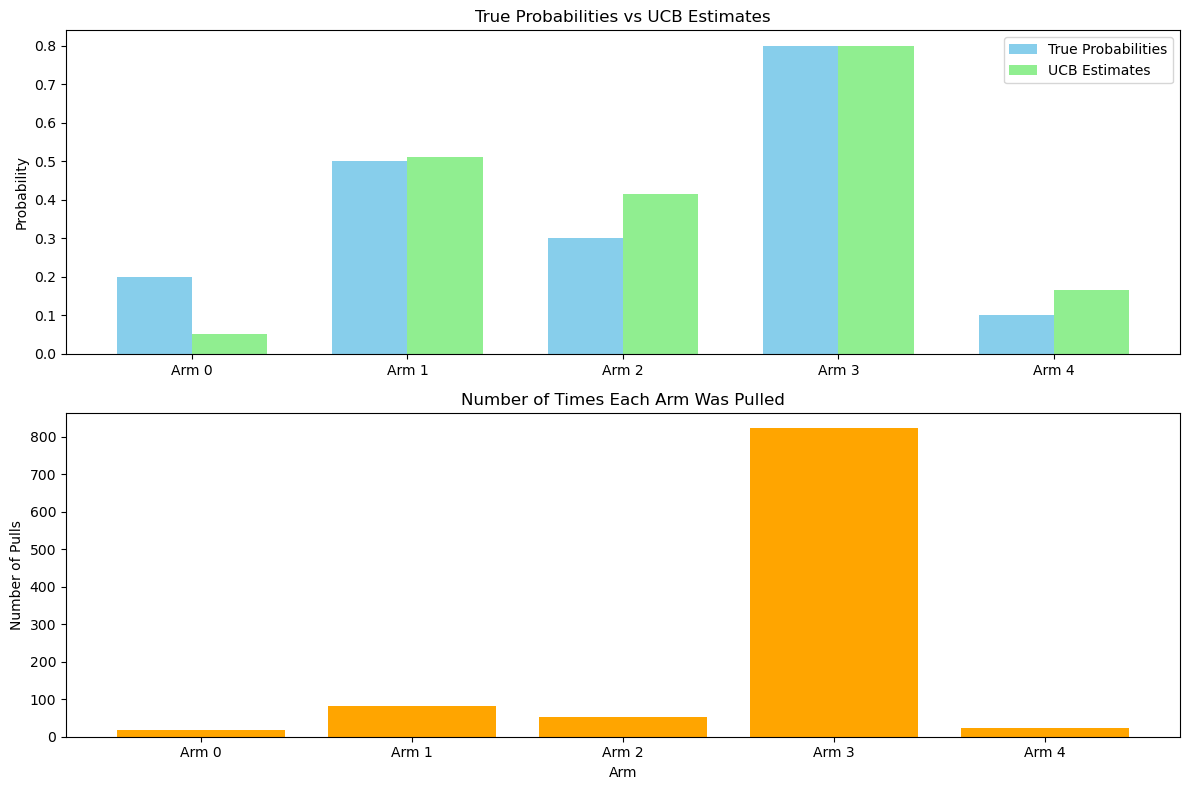


Statistics:
Most played arm: 3
Best performing arm (true): 3
Final accuracy (estimate vs true): 0.06865420426252487


In [ ]:
import matplotlib.pyplot as plt

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot 1: True Probabilities vs Estimates
x = range(n_arms)
width = 0.35

ax1.bar([i - width/2 for i in x], true_rewards, width, label='True Probabilities', color='skyblue')
ax1.bar([i + width/2 for i in x], estimates, width, label='UCB Estimates', color='lightgreen')
ax1.set_ylabel('Probability')
ax1.set_title('True Probabilities vs UCB Estimates')
ax1.set_xticks(x)
ax1.set_xticklabels([f'Arm {i}' for i in x])
ax1.legend()

# Plot 2: Number of Pulls
ax2.bar(x, n_pulls, color='orange')
ax2.set_xlabel('Arm')
ax2.set_ylabel('Number of Pulls')
ax2.set_title('Number of Times Each Arm Was Pulled')
ax2.set_xticks(x)
ax2.set_xticklabels([f'Arm {i}' for i in x])

plt.tight_layout()
plt.show()

# Print some statistics
print("\nStatistics:")
print("Most played arm:", np.argmax(n_pulls))
print("Best performing arm (true):", np.argmax(true_rewards))
print("Final accuracy (estimate vs true):",
      np.mean(np.abs(estimates - true_rewards)))

The beauty of UCB is that it automatically balances exploration and exploitation. At the start, it tries everything because the exploration bonus is high for untried options. As it learns more, it focuses more on the best options while still occasionally trying others just to make sure it hasn't missed anything.

## Thompson Sampling: Learning Through Probabilities

Imagine standing before a row of slot machines, each with an unknown probability of paying out. Your goal is to find the best machine while maximizing your winnings during the process. This dilemma is elegantly solved by **Thompson Sampling**, a probabilistic algorithm for balancing **exploration** and **exploitation** in the Multi-Armed Bandit problem.

---

### Why Use Probability?

Instead of maintaining a single estimate for the reward of each arm (machine), Thompson Sampling uses a **probability distribution** to represent the uncertainty about each arm’s reward. This approach allows the algorithm to:
- Explore less-played arms occasionally.
- Focus more on arms with higher observed rewards.

---

### How It Works

1. **Initial Belief**:
   - Start with a uniform distribution for each arm, reflecting equal uncertainty.

2. **Play and Update**:
   - With every pull of an arm, observe the reward and update its probability distribution.

3. **Decision Making**:
   - Sample a potential reward from each arm’s distribution.
   - Select the arm with the highest sampled reward.

This probabilistic approach ensures a natural balance between trying unexplored options and exploiting known good ones.

---

### Core Idea: Balancing Learning and Winning

Thompson Sampling provides a way to:
- Identify promising options (exploration).
- Maximize rewards while learning (exploitation).

For each arm, the algorithm maintains two parameters:
- **$( \alpha )$**: Represents wins (successes) + 1.
- **$( \beta )$**: Represents losses (failures) + 1.

These parameters shape the Beta distribution, which models our belief about an arm’s true win rate.

---

### The Process

1. **Before Each Play**:
   - For every arm, sample a random value from its Beta distribution.
   - Select the arm with the highest sampled value.

2. **After Each Play**:
   - If the arm wins: Increment $( \alpha )$ for that arm.
   - If the arm loses: Increment $( \beta )$ for that arm.

---

### Why the Beta Distribution?

The Beta distribution provides a flexible way to model probabilities:
- **High $( \alpha )$** (more wins): The distribution shifts right, favoring higher expected win rates.
- **High $( \beta )$** (more losses): The distribution shifts left, favoring lower expected win rates.
- **Increased Total Plays**: The distribution narrows, reflecting greater confidence.

---

### Summary of the Math

The algorithm samples from:

$$
P(\text{Win Rate of Arm } i) \sim \text{Beta}(\alpha_i, \beta_i)
$$

Where:
- $( \alpha_i )$: Number of successes (wins) + 1.
- $( \beta_i )$: Number of failures (losses) + 1.

This sampling ensures a balance between exploring new options and exploiting known rewards.

---

### Steps for Implementation

Let’s break it into actionable steps:
1. **Simulate Slot Machines**:
   - Create a simulator with known probabilities for each arm.
2. **Implement Thompson Sampling**:
   - Maintain \( \alpha \) and \( \beta \) for each arm.
3. **Run Simulations**:
   - Use the algorithm to select arms over multiple rounds.
4. **Visualize Results**:
   - Analyze how the algorithm balances exploration and exploitation.

**Optional**: Dive deeper into the math of Thompson Sampling 👉 [here](https://colab.research.google.com/drive/1zPBikE3NznnSCLLn9hz9pi6QY97txc2F)



In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import pandas as pd

In [ ]:
# Create our Slot Machine (Bandit) Simulator
class SlotMachine:
    def __init__(self, prob_success):
        self.prob_success = prob_success

    def pull(self):
        # Returns 1 (win) with probability prob_success, 0 (loss) otherwise
        return np.random.random() < self.prob_success

In [ ]:
# Create Thompson Sampling Agent
class ThompsonAgent:
    def __init__(self, n_arms):
        # For each arm, track successes (alpha) and failures (beta)
        self.n_arms = n_arms
        # Initialize with 1,1 for each arm (assume no prior knowledge)
        self.alphas = np.ones(n_arms)
        self.betas = np.ones(n_arms)

    def select_arm(self):
        # Sample from beta distribution for each arm
        samples = [np.random.beta(self.alphas[i], self.betas[i])
                  for i in range(self.n_arms)]
        # Return arm with highest sampled value
        return np.argmax(samples)

    def update(self, arm, reward):
        # Update the chosen arm's alpha (if won) or beta (if lost)
        if reward == 1:
            self.alphas[arm] += 1
        else:
            self.betas[arm] += 1

In [ ]:
# Run Simulation
def run_simulation(true_probs, n_rounds):
    # Setup environment
    machines = [SlotMachine(p) for p in true_probs]
    agent = ThompsonAgent(len(true_probs))

    # Track history
    history = []
    cumulative_rewards = 0

    for round in range(n_rounds):
        # Select arm
        chosen_arm = agent.select_arm()

        # Get reward
        reward = machines[chosen_arm].pull()

        # Update agent's knowledge
        agent.update(chosen_arm, reward)

        # Track results
        cumulative_rewards += reward
        history.append({
            'round': round,
            'chosen_arm': chosen_arm,
            'reward': reward,
            'cumulative_reward': cumulative_rewards,
            'average_reward': cumulative_rewards / (round + 1)
        })

    return pd.DataFrame(history)

In [ ]:
# Visualization Functions
def plot_results(results, true_probs):
    plt.figure(figsize=(15, 5))

    # Plot average reward over time
    plt.subplot(1, 2, 1)
    plt.plot(results['round'], results['average_reward'])
    plt.axhline(y=max(true_probs), color='r', linestyle='--',
                label=f'Best arm ({max(true_probs):.2f})')
    plt.xlabel('Round')
    plt.ylabel('Average Reward')
    plt.title('Average Reward over Time')
    plt.legend()

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

In [ ]:
# Define true probabilities for each arm
true_probs = [0.2, 0.5, 0.75, 0.4]

In [ ]:
# Run simulation
results = run_simulation(true_probs, n_rounds=1000)

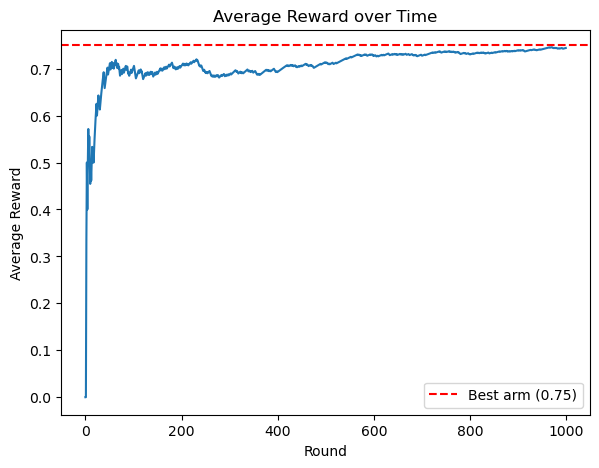

In [ ]:
# Plot results
plot_results(results, true_probs)